- Importo las librerias principales que voy a usar en el proyecto

In [739]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos y exploración inicial
- Cargo el archivo excel con todas las hojas al mismo tiempo

In [740]:
Internet = '../datasets/Internet.xlsx'
data = pd.read_excel(Internet, sheet_name=None)

- Realizo una copia del dataset

In [741]:
data_copy = data.copy()

- Exploro el diccionario con todas las hojas guardadas

In [742]:
data_copy.keys()

dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos '])

### Accedo a la primera hoja

In [743]:
df_1 = data_copy['Acc_vel_loc_sinrangos']
df_1.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Verifico las dimenciones

In [744]:
df_1.shape

(3065, 125)

- Verifico el rango y tipos de datos

In [745]:
df_1.dtypes

Provincia      object
Partido        object
Localidad      object
Link Indec     object
Otros         float64
               ...   
999 Mbps      float64
1000 Mbps     float64
1024 Mbps     float64
4000 Mbps     float64
10000 Mbps    float64
Length: 125, dtype: object

# Limpieza de datos

- *Valores faltantes:* Identifico columnas con valores faltantes para definir una estrategia

In [746]:
# Reviso los valores faltantes

valfalt_1 = df_1.isna().sum()
print(valfalt_1[valfalt_1 > 0])

Otros         2035
0,256 Mbps    3029
0,5 Mbps      2423
0,512 Mbps    2540
0,75 Mbps     2781
              ... 
999 Mbps      3048
1000 Mbps     2645
1024 Mbps     3063
4000 Mbps     3064
10000 Mbps    3063
Length: 121, dtype: int64


In [747]:
# Muestro el porcentaje de valores faltantes por columna de forma ascendente

porctjval_1 = (df_1.isna().sum() / len(df_1)) * 100
print(porctjval_1[porctjval_1 > 0].sort_values(ascending=False))

2,2 Mbps     99.967374
6,4 Mbps     99.967374
7,5 Mbps     99.967374
10,1 Mbps    99.967374
10,2 Mbps    99.967374
               ...    
20 Mbps      65.285481
15 Mbps      64.176183
3 Mbps       58.760196
6 Mbps       56.052202
10 Mbps      43.556281
Length: 121, dtype: float64


In [748]:
# Reviso las columnas con 50% aumentando progresivamente a 90% de valores nulos para tomar una desición

threshold = 90
columns_to_drop = porctjval_1[porctjval_1 > threshold].index
df_1_limpio = df_1.drop(columns=columns_to_drop)

In [749]:
print(df_1_limpio.shape)
print(df_1_limpio.head())

(3065, 25)
      Provincia     Partido          Localidad Link Indec  Otros  0,5 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN       2.0   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN       NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN       1.0   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN       NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN       NaN   

   0,512 Mbps  1 Mbps  2 Mbps  3 Mbps  ...  10 Mbps  15 Mbps  20 Mbps  \
0         NaN     NaN     NaN    85.0  ...    288.0    415.0   1797.0   
1         NaN     NaN     NaN     NaN  ...     59.0      NaN      5.0   
2         NaN     NaN     NaN   181.0  ...     10.0      NaN      NaN   
3         NaN     NaN     NaN     NaN  ...      NaN      NaN      NaN   
4         NaN     NaN   106.0     3.0  ...      1.0      NaN      NaN   

   25 Mbps  30 Mbps  50 Mbps  100 Mbps  300 Mbps  500 Mbps  1000 Mbps  
0    144.

### Decido imputar los valores nulos con 0 para el análisis

In [750]:
# Identifico las columnas de velocidades de conexión
columns_null = [col for col in df_1.columns if 'Mbps' or 'Otros' in col]

#Imputo valores nulos con 0 en las columnas identificadas
df_1[columns_null] = df_1[columns_null].fillna(0)

In [751]:
df_1.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- *Valores atípicos* (Outliers): Uso boxplots para detectar posibles outliers en variables númericas

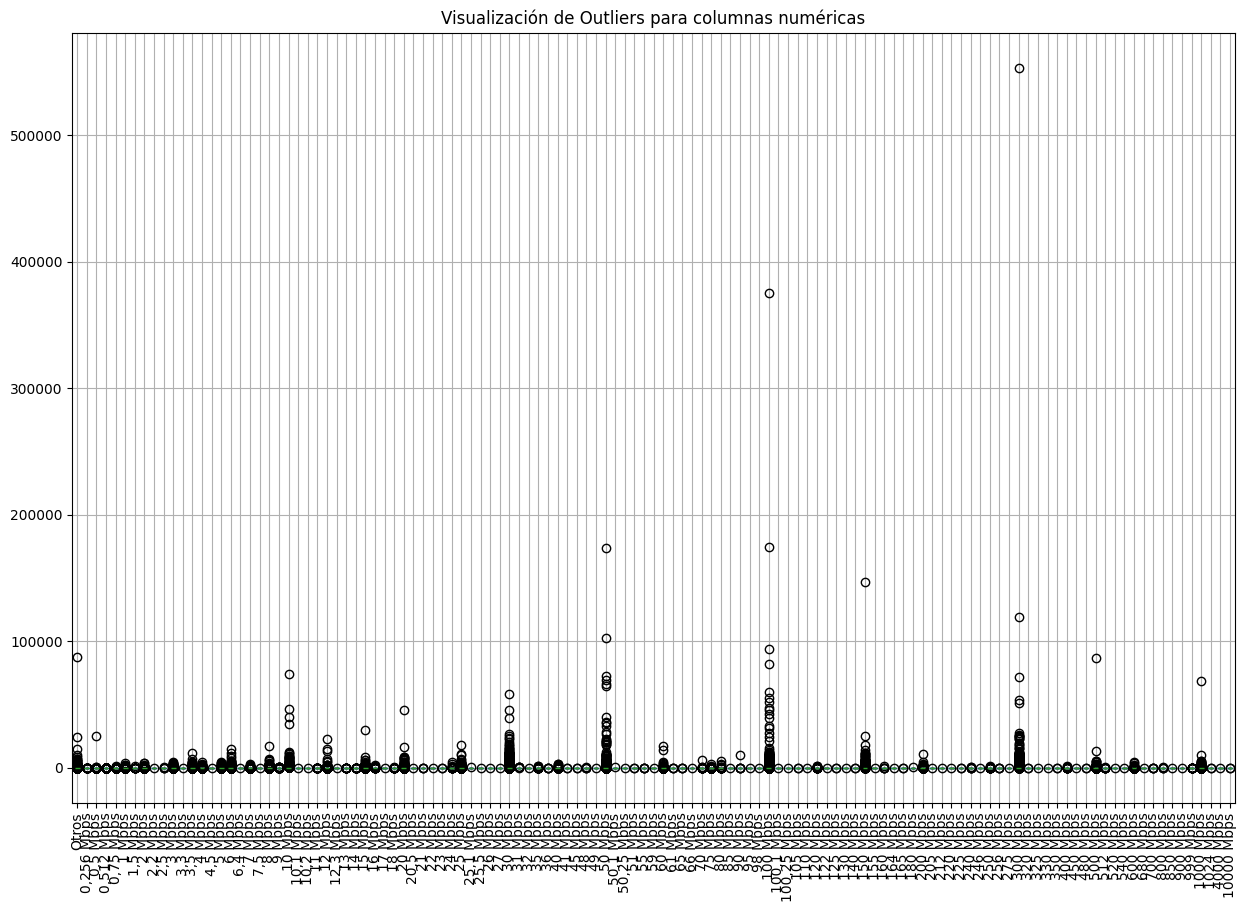

In [752]:
# Visualizacion de outliers para todas las columbas númericas
col_numer = df_1.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
df_1[col_numer].boxplot(rot=90)
plt.title('Visualización de Outliers para columnas numéricas')
plt.show()

## - Determino que no son outliers para mi analisis

# Análisis descriptivo

- *Distribucion de variables:* Analizo la distribucion de todas las variables

              Otros   0,256 Mbps      0,5 Mbps   0,512 Mbps    0,75 Mbps  \
count   3065.000000  3065.000000   3065.000000  3065.000000  3065.000000   
mean     107.071126     0.034584      9.002284     0.359869     3.668189   
std     1724.802263     0.696957    451.079743     2.092825    37.817816   
min      -15.000000     0.000000      0.000000     0.000000     0.000000   
25%        0.000000     0.000000      0.000000     0.000000     0.000000   
50%        0.000000     0.000000      0.000000     0.000000     0.000000   
75%        1.000000     0.000000      0.000000     0.000000     0.000000   
max    87722.000000    31.000000  24968.000000    61.000000  1307.000000   

            1 Mbps     1,5 Mbps       2 Mbps     2,2 Mbps     2,5 Mbps  ...  \
count  3065.000000  3065.000000  3065.000000  3065.000000  3065.000000  ...   
mean     18.959869     0.648613    22.403589     0.005873     0.204241  ...   
std     122.302572    21.750518   137.560321     0.325130     8.726818  ...   

C:\Users\elian\AppData\Local\Temp\ipykernel_14424\1153863448.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


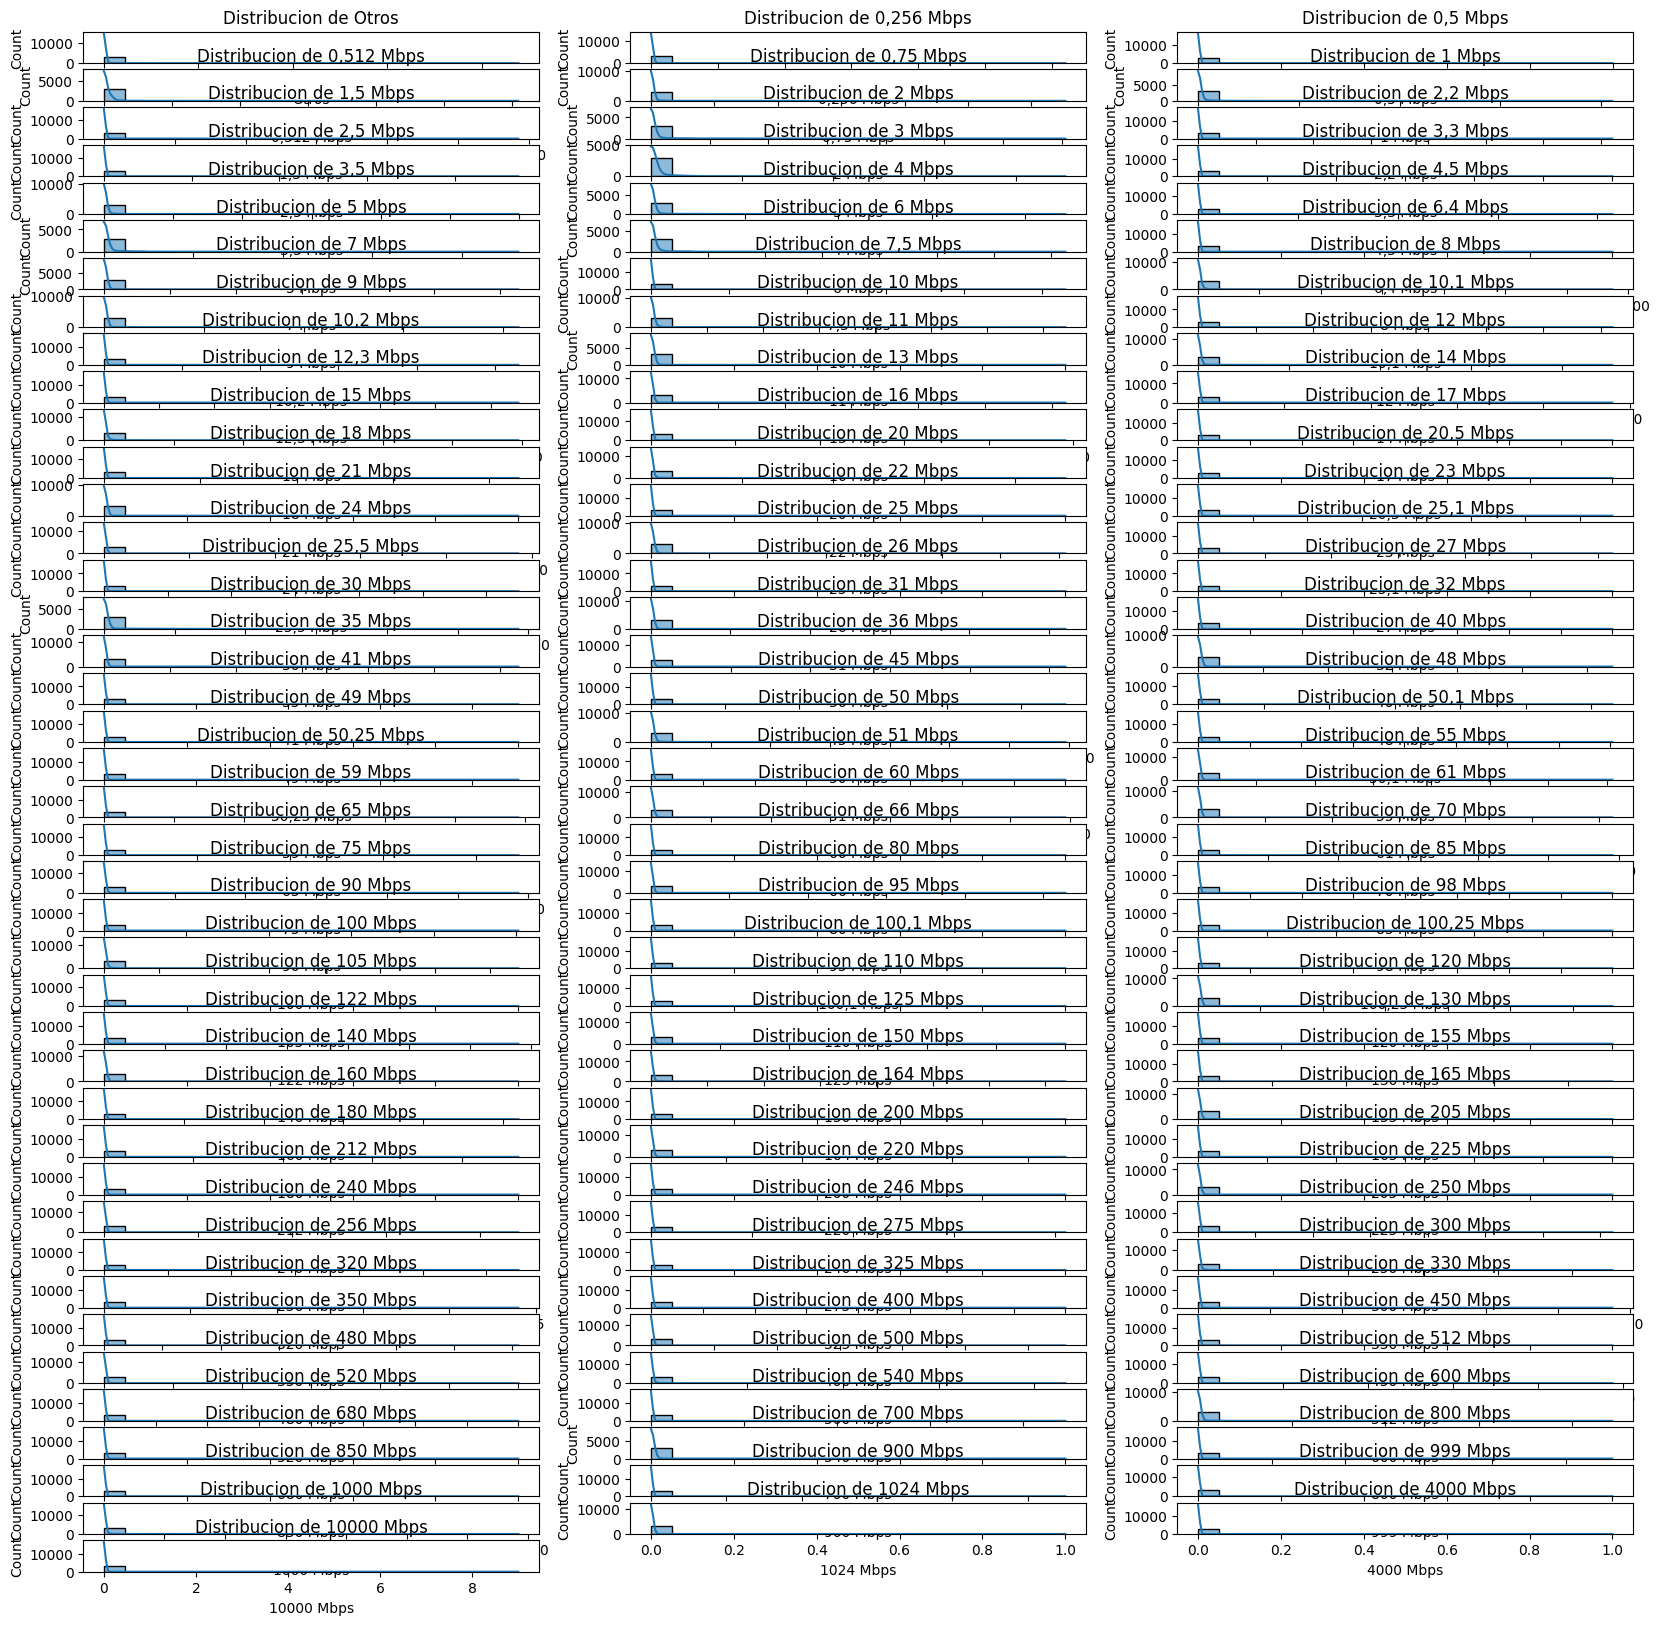

In [753]:
# Resumen estadistico de las variables numéricas
print(df_1.describe())

# Distribucion de todas las varibles numéricas
plt.figure(figsize=(20, 20))
for i, col in enumerate(col_numer):
    plt.subplot(len(col_numer) // 3 + 1, 3, i + 1)
    sns.histplot(df_1[col].dropna(), bins=20, kde=True)
    plt.title(f'Distribucion de {col}')
plt.tight_layout()
plt.show()

- Relaciones entre las variables

In [754]:
# Matriz de correlacion
# corr_matrix = df_1.corr()

## Cuando quiero hacer una matriz de relacion descubro que hay valores de tipo cadena de texto "Sin Datos" inicialmente las reemplazo por 'NaN' para lograr la matriz de correlación

In [755]:
# Reemplazo los valores no numéricos con NaN
df_1.replace("Sin Datos", np.nan, inplace=True)

C:\Users\elian\AppData\Local\Temp\ipykernel_14424\1494941682.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1.replace("Sin Datos", np.nan, inplace=True)


In [756]:
# Filtro las columnas numéricas
df_1_numerico = df_1.select_dtypes(include=['float64', 'int64'])

In [757]:
# Calculo nuevamente la matriz de correlación
corr_matrix = df_1_numerico.corr()

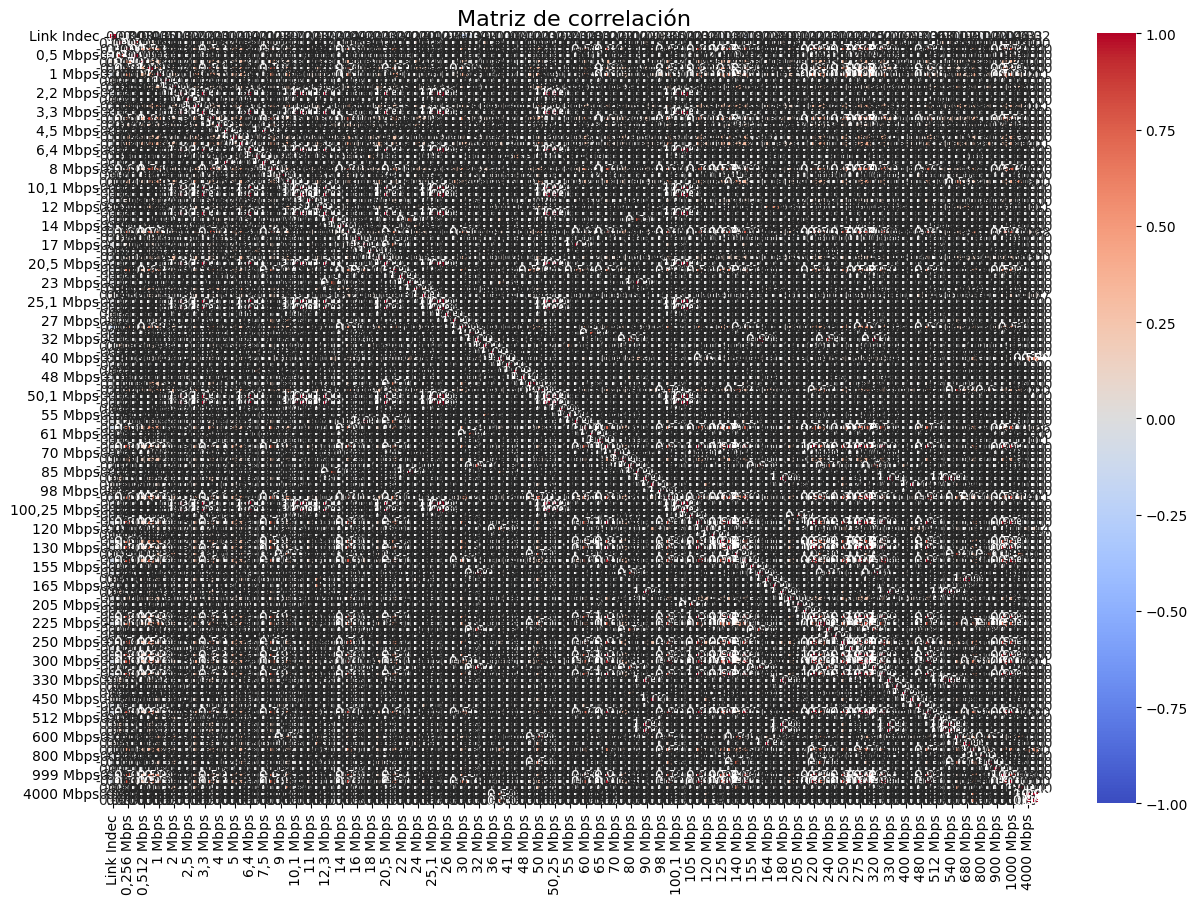

In [758]:
# Visualizo la matriz de correlación con un heatmap
# Creo el Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.1, vmin=-1, vmax=1)
plt.title('Matriz de correlación', fontsize=16)
plt.show()

### Determino que mi heatmap esta muy cargado de variables para poder tomar una decisión. Busco otra alternativa

- Análisis de Correlación Iterativo. Comienzo con todas las variables y luego reduje el conjunto a aquellas que muestran correlaciones fuertes con una o más variables de interés.

In [759]:
# Genero nuevamente la matriz de correlación con la variable que contiene solamente columnas númericas
corr_matrix = df_1_numerico.corr()

# Identifico correlaciones fuertes (ajusta el umbral según sea necesario)
correlaciones_fuertes = corr_matrix[(corr_matrix > 1) | (corr_matrix < -1)]

# Filtro las columnas que tienen correlaciones fuertes
col_correlacion_fuertes = correlaciones_fuertes.columns[correlaciones_fuertes.any()].tolist()
df_correlacion_fuertes = df_1[col_correlacion_fuertes]

- Visualizo las correlaciones filtradas

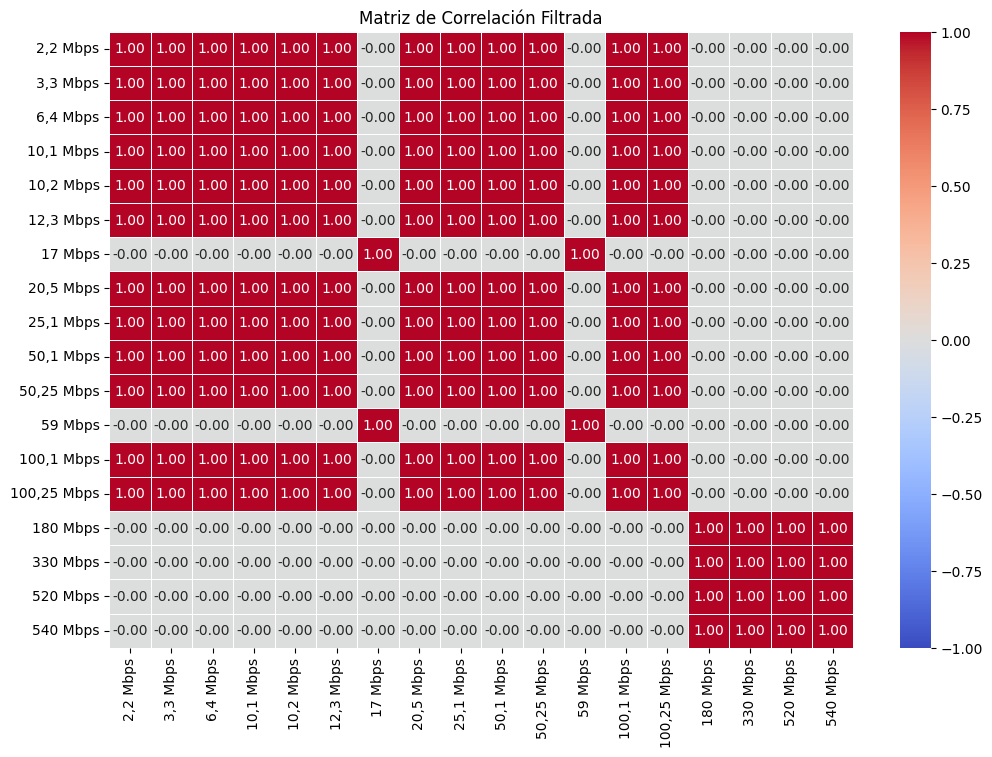

In [760]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_correlacion_fuertes.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación Filtrada')
plt.show()

### Conclusión: procedo a eliminar las columnas que tiene correlaciones fuertes ya que me indican información redundantes.

In [761]:
# Identifico las columnas con correlación de 1 (excluyendo la diagonal)
# Hago la comparación para cada par de columnas
columns_to_drop = set(df_correlacion_fuertes)
for i in range(len(df_correlacion_fuertes.columns)):
    for j in range(i):
        if df_correlacion_fuertes.iloc[i, j] == 1:
            colname = df_correlacion_fuertes.columns[i]
            columns_to_drop.add(colname)

# Elimino las columnas con correlación perfecta
df_reduced_1 = df_1.drop(columns=columns_to_drop)

In [762]:
# Verifico que las columnas eliminadas son las de correlaciones fuertes
print(f"Columnas eliminadas: {columns_to_drop}")

Columnas eliminadas: {'3,3 Mbps', '59 Mbps', '50,25 Mbps', '100,1 Mbps', '330 Mbps', '2,2 Mbps', '520 Mbps', '50,1 Mbps', '10,1 Mbps', '6,4 Mbps', '25,1 Mbps', '540 Mbps', '12,3 Mbps', '17 Mbps', '20,5 Mbps', '180 Mbps', '10,2 Mbps', '100,25 Mbps'}


- Muestro el df reducido de la hoja 1 del dataset

In [763]:
df_reduced_1

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100.0,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3061,TUCUMAN,Trancas,San Pedro de Colalao,90112020.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3062,TUCUMAN,Trancas,Villa de Trancas,90112030.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,TUCUMAN,Yerba Buena,Villa Carmela,90119020.0,8.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exporto el df para trabajar en conjunto en el notebook 'etleda_hoja2'

In [764]:
df_reduced_1.to_csv('etleda_hoja1.csv')

# Comienzo segmentación utilizando K-means

### Primero estandarizo las características para que todas tengan una media de 0 y desviación estándar de 1.

In [765]:
from sklearn.preprocessing import StandardScaler

# Selecciono las caracteristicas
caracteristicas_1 = df_reduced_1[['1 Mbps', '3,5 Mbps', '6 Mbps', '8 Mbps', '10 Mbps', '12 Mbps', '15 Mbps', '20 Mbps', '25 Mbps', '30 Mbps', '50 Mbps', '100 Mbps', '150 Mbps', '200 Mbps', '300 Mbps', '500 Mbps', '1000 Mbps']]

# si los hubiere imputo valores falttantes
caracteristicas_1 = caracteristicas_1.fillna(0)

# Estandarizo
scaler = StandardScaler()
caracteristicas_1_scaled = scaler.fit_transform(caracteristicas_1)

- Implementación de K-means

Segmento las localidades/provincias en diferentes clusters. Elijo un número de clusters arbitrario, como 5, y luego ajusta el número basado en el análisis posterior.

In [766]:
from sklearn.cluster import KMeans

# Inicializo K-means

kmeans = KMeans(n_clusters=3, random_state=24)
kmeans.fit(caracteristicas_1_scaled)

# Asigno etiqueta de cluster al df
df_reduced_1['Cluster_Kmeans'] = kmeans.labels_

C:\Users\elian\AppData\Local\Temp\ipykernel_14424\2872786091.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_reduced_1['Cluster_Kmeans'] = kmeans.labels_


- Determino el número óptimo de clusters: Utilizo la "tecnica del codo" para encontrar el número optimo de cluster. Grafico la inercia frente al numero de cluster

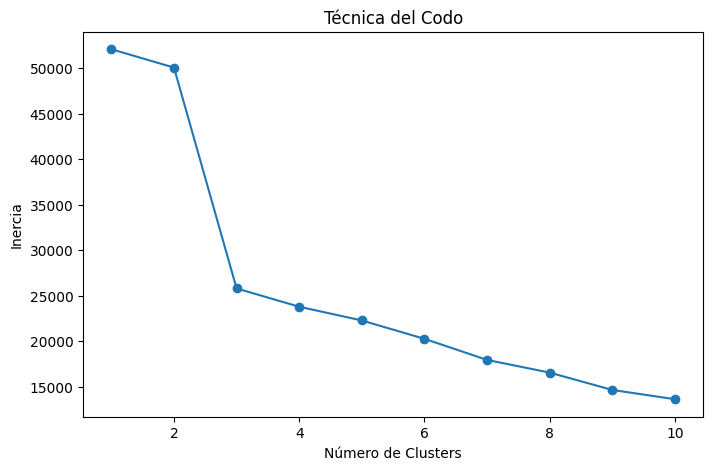

In [767]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=24)
    kmeans.fit(caracteristicas_1_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Técnica del Codo')
plt.show()

### Implementación de DBSCAN pero no fue util para mi analisis

In [768]:
# from sklearn.cluster import DBSCAN

# Inicializar DBSCAN
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan.fit(caracteristicas_1_scaled)

# Asignar etiquetas de clusters al dataframe
# df_reduced_1['Cluster_DBSCAN'] = dbscan.labels_

### Análisis de Resultados

Visualizacion de Clusters

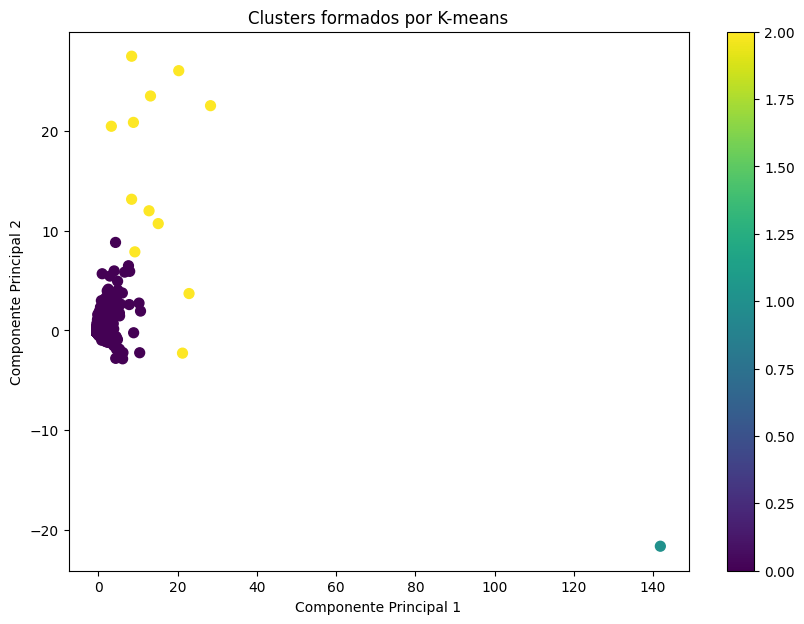

In [769]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad
pca = PCA(n_components=2)
features_pca = pca.fit_transform(caracteristicas_1_scaled)

# Visualización
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df_reduced_1['Cluster_Kmeans'], cmap='viridis', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters formados por K-means')
plt.colorbar()
plt.show()

# Llego a un un punto donde mi analisis no tiene un objetivo claro, pues determino volver al comienzo para avanzar segun un objetivo concreto.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Vuelvo a comenzar con mis datos segun el dataframe = df_reduced_1

In [770]:
df_reduced_1.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps,Cluster_Kmeans
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100.0,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [771]:
df_reduced_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 108 entries, Provincia to Cluster_Kmeans
dtypes: float64(104), int32(1), object(3)
memory usage: 2.5+ MB


- Verifico los valores nulos desde la columna de velocidades

In [772]:
print(df_reduced_1.isnull().sum())

Provincia          0
Partido            0
Localidad          0
Link Indec        74
Otros              0
                  ..
1000 Mbps          0
1024 Mbps          0
4000 Mbps          0
10000 Mbps         0
Cluster_Kmeans     0
Length: 108, dtype: int64


In [773]:
df_reduced_1.isnull().sum()

Provincia          0
Partido            0
Localidad          0
Link Indec        74
Otros              0
                  ..
1000 Mbps          0
1024 Mbps          0
4000 Mbps          0
10000 Mbps         0
Cluster_Kmeans     0
Length: 108, dtype: int64

- Reviso nuevamente los duplicados

In [774]:
df_reduced_1.duplicated().sum()

np.int64(0)

### Dispongo a normalizar todo el dataset

- Comienzo con las minusculas

In [775]:
df_reduced_1.columns = df_reduced_1.columns.str.lower()

- Eliminar Espacios en Blanco y Reemplazar con Guiones Bajos

In [776]:
df_reduced_1.columns = df_reduced_1.columns.str.replace(' ', '_')

- Elimino caracteres especiales

In [777]:
df_reduced_1.columns = df_reduced_1.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_reduced_1.columns = df_reduced_1.columns.str.replace(r'[^\w\s]', '', regex=True)

In [778]:
df_reduced_1

,provincia,partido,localidad,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,700_mbps,800_mbps,850_mbps,900_mbps,999_mbps,1000_mbps,1024_mbps,4000_mbps,10000_mbps,cluster_kmeans
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100.0,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0
3061,TUCUMAN,Trancas,San Pedro de Colalao,90112020.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3062,TUCUMAN,Trancas,Villa de Trancas,90112030.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3063,TUCUMAN,Yerba Buena,Villa Carmela,90119020.0,8.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


- Aplico el mismo proceso en las columnas 'provincia', 'partido' y 'localidad'

In [779]:
# Normalizar valores en columnas específicas
df_reduced_1['provincia'] = df_reduced_1['provincia'].str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(r'[^\w\s]', '', regex=True)
df_reduced_1['partido'] = df_reduced_1['partido'].str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(r'[^\w\s]', '', regex=True)
df_reduced_1['localidad'] = df_reduced_1['localidad'].str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(r'[^\w\s]', '', regex=True)


In [780]:
df_reduced_1

,provincia,partido,localidad,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,700_mbps,800_mbps,850_mbps,900_mbps,999_mbps,1000_mbps,1024_mbps,4000_mbps,10000_mbps,cluster_kmeans
0,buenos_aires,25_de_mayo,25_de_mayo,6854100.0,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,buenos_aires,25_de_mayo,agustin_mosconi,6854010.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,buenos_aires,25_de_mayo,del_valle,6854020.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,buenos_aires,25_de_mayo,ernestina,6854030.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,buenos_aires,25_de_mayo,gobernador_ugarte,6854040.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,tucuman,tafi_viejo,villa_mariano_moreno__el_colmenar,90105100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0
3061,tucuman,trancas,san_pedro_de_colalao,90112020.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3062,tucuman,trancas,villa__de_trancas,90112030.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3063,tucuman,yerba_buena,villa_carmela,90119020.0,8.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


- Quiero saber cuantas categorias unicas existen en mi df

In [781]:
# Filtro solo columnas categóricas
columnas_categoricas = df_reduced_1.select_dtypes(include=['object'])

# Calculo el número de categorías únicas en las columnas categóricas
unicas_categorias_categoricas = columnas_categoricas.nunique()

# Muestro el resultado
print(unicas_categorias_categoricas)

provincia      24
partido       432
localidad    2776
dtype: int64


- Elimino filas donde en las columnas "provincia", "partido" o "localidad" contengan los strings "Sin Datos" u "Otros"

In [782]:
df_reduced_1 = df_reduced_1[~df_reduced_1['provincia'].str.contains('sin_datos|otros', case=False, na=False) &
        ~df_reduced_1['partido'].str.contains('sin_datos|otros', case=False, na=False) &
        ~df_reduced_1['localidad'].str.contains('sin_datos|otros', case=False, na=False)]


In [825]:
# Verifico el tamaño
df_reduced_1.shape

(2995, 109)

# Creo la columna velocidad_promedio y excluyo las columnas 'link_indec' y 'otros' para mi analisis objetivo

In [784]:
# Columnas que voy a excluir momentaneamente
columnas_excluidas = ['link_indec', 'otros']

# Selecciono las columnas de tipo cuantitativas, excluyendo las columnas que no voy a usar
velocidades = df_reduced_1.select_dtypes(include=['float']).drop(columns=columnas_excluidas, errors='ignore')

# Calculo la velocidad promedio para cada fila
df_reduced_1['velocidad_promedio'] = velocidades.mean(axis=1)

C:\Users\elian\AppData\Local\Temp\ipykernel_14424\2295941323.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_reduced_1['velocidad_promedio'] = velocidades.mean(axis=1)
C:\Users\elian\AppData\Local\Temp\ipykernel_14424\2295941323.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced_1['velocidad_promedio'] = velocidades.mean(axis=1)


## Analisis descriptivo

- Calcúlo estadísticas descriptivas para las velocidades de internet

In [785]:
df_reduced_1.describe()

,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,15_mbps,2_mbps,25_mbps,...,800_mbps,850_mbps,900_mbps,999_mbps,1000_mbps,1024_mbps,4000_mbps,10000_mbps,cluster_kmeans,velocidad_promedio
count,2.991000e+03,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,...,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000
mean,3.958343e+07,66.182638,0.035392,0.834391,0.368280,3.752254,19.346578,0.663773,22.860434,0.209015,...,0.205008,0.000334,0.036728,0.019032,83.828715,0.000668,0.000334,0.003339,0.008347,36.897185
std,2.975212e+07,635.834563,0.705037,9.744461,2.116417,38.253235,123.686615,22.003085,139.117242,8.828189,...,10.311386,0.018273,2.009992,0.486942,1297.903779,0.025837,0.018273,0.165460,0.127657,314.202421
min,2.000010e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.008056e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235294
50%,3.401406e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588235
75%,6.614004e+07,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.186275
max,9.401402e+07,24594.000000,31.000000,451.000000,61.000000,1307.000000,4111.000000,1170.000000,3530.000000,472.000000,...,563.000000,1.000000,110.000000,25.000000,68405.000000,1.000000,1.000000,9.000000,2.000000,14752.068627


## Manejo los Outliers

Verifico si existen outliers mediante el método de la Caja de Bigotes (Boxplot)

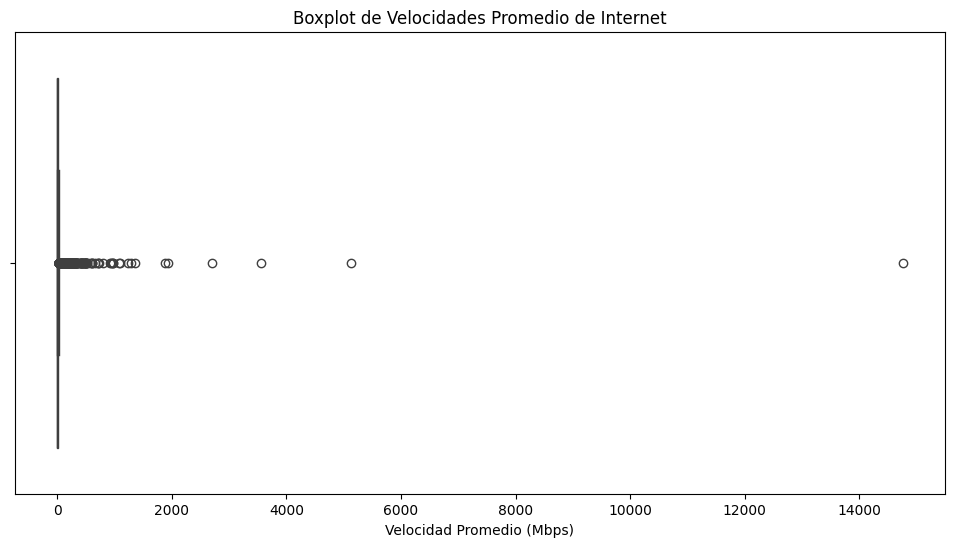

In [786]:
# Crear un boxplot para la velocidad promedio
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_reduced_1['velocidad_promedio'])
plt.title('Boxplot de Velocidades Promedio de Internet')
plt.xlabel('Velocidad Promedio (Mbps)')
plt.show()

- Verifico si existen outliers mediante el método de la Desviación Estándar

In [787]:
# Calcular la media y la desviación estándar
mean = df_reduced_1['velocidad_promedio'].mean()
std_dev = df_reduced_1['velocidad_promedio'].std()

# Definir los límites para los outliers
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Filtrar los outliers
outliers = df_reduced_1[(df_reduced_1['velocidad_promedio'] < lower_bound) | (df_reduced_1['velocidad_promedio'] > upper_bound)]

print(f'Número de outliers encontrados: {outliers.shape[0]}')
print(outliers[['provincia', 'velocidad_promedio']])

Número de outliers encontrados: 12
         provincia  velocidad_promedio
62    buenos_aires         1229.245098
271   buenos_aires         2701.078431
374   buenos_aires         1937.343137
717           caba        14752.068627
860          chaco          981.009804
956        cordoba         5125.166667
1816       mendoza         1097.686275
1975      misiones         1075.088235
2214         salta         1352.431373
2667      santa_fe         1281.990196
2725      santa_fe         3564.186275
3000       tucuman         1886.843137


- Visualización de Outliers con un Histograma

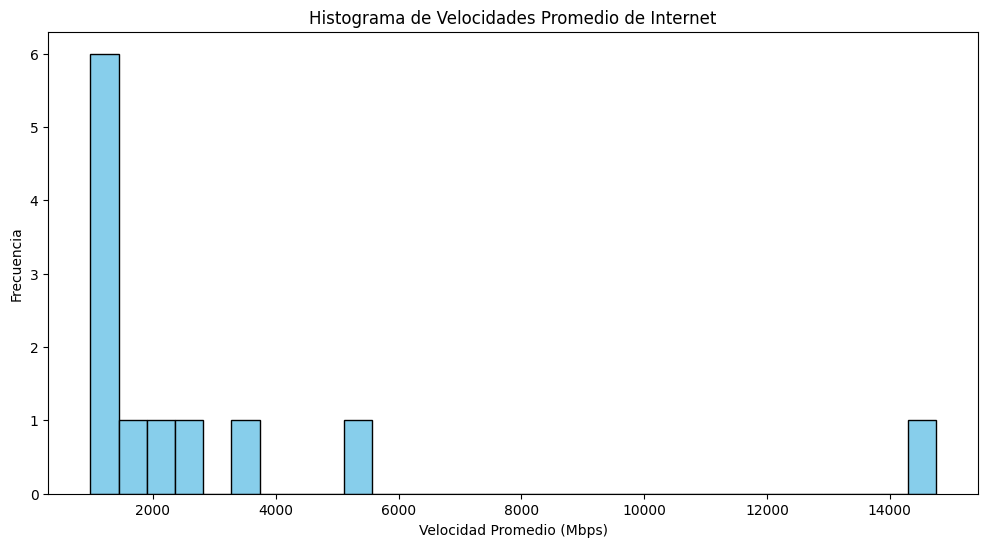

In [788]:
plt.figure(figsize=(12, 6))
plt.hist(outliers['velocidad_promedio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Velocidades Promedio de Internet')
plt.xlabel('Velocidad Promedio (Mbps)')
plt.ylabel('Frecuencia')
plt.show()

### No tomo en cuenta los outliers y calculo la velocidad promedio de conexión en cada localidad y provincia para graficarlas.

In [789]:
# Agrupar por provincia y localidad, y calcular la velocidad promedio
df_agrupados_x_velprom = df_reduced_1.groupby(['provincia', 'localidad'])['velocidad_promedio'].mean().reset_index()

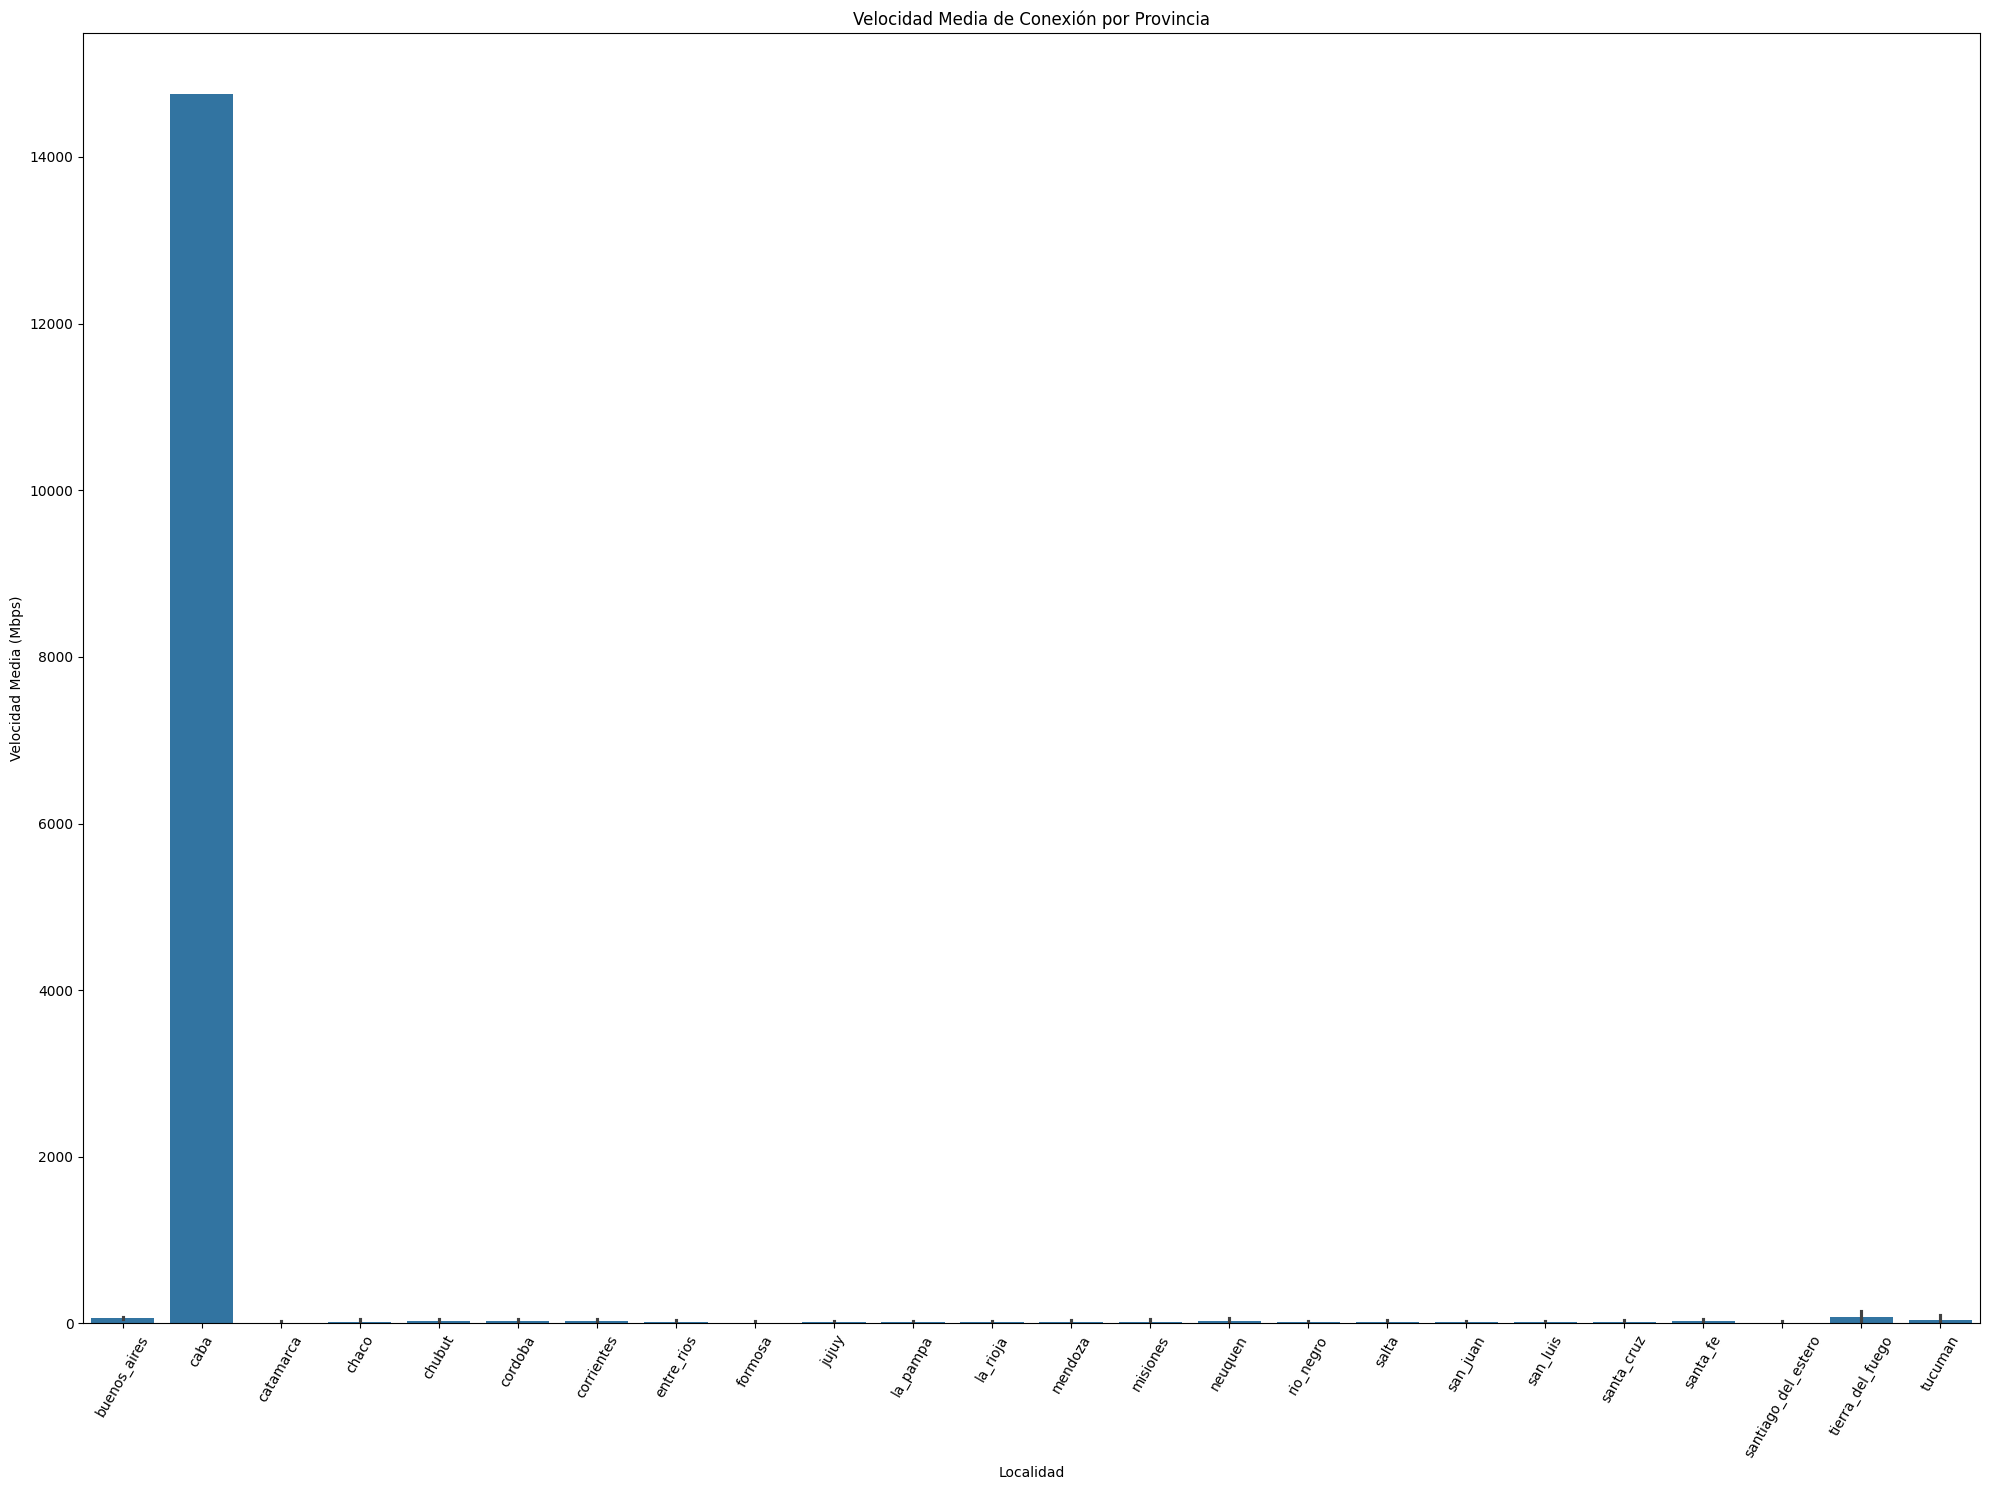

In [790]:
# Creo un gráfica de barras
plt.figure(figsize=(20, 15))
sns.barplot(data=df_agrupados_x_velprom, x='provincia', y='velocidad_promedio')

# Configuro los títulos y etiquetas
plt.title('Velocidad Media de Conexión por Provincia')
plt.xlabel('Localidad')
plt.ylabel('Velocidad Media (Mbps)')
plt.xticks(rotation=60)

# Muestro la gráfica
plt.tight_layout()
plt.show()

### Calculo la velocidad promedio por provincia

In [791]:
# Agrupar por provincia y calcular la velocidad promedio
provincia_promedio = df_agrupados_x_velprom.groupby('provincia')['velocidad_promedio'].mean().reset_index()

In [792]:
# Ordeno provincias por velocidad promedio de menor a mayor
provincia_promedio_ordenado = provincia_promedio.sort_values(by='velocidad_promedio', ascending=True)

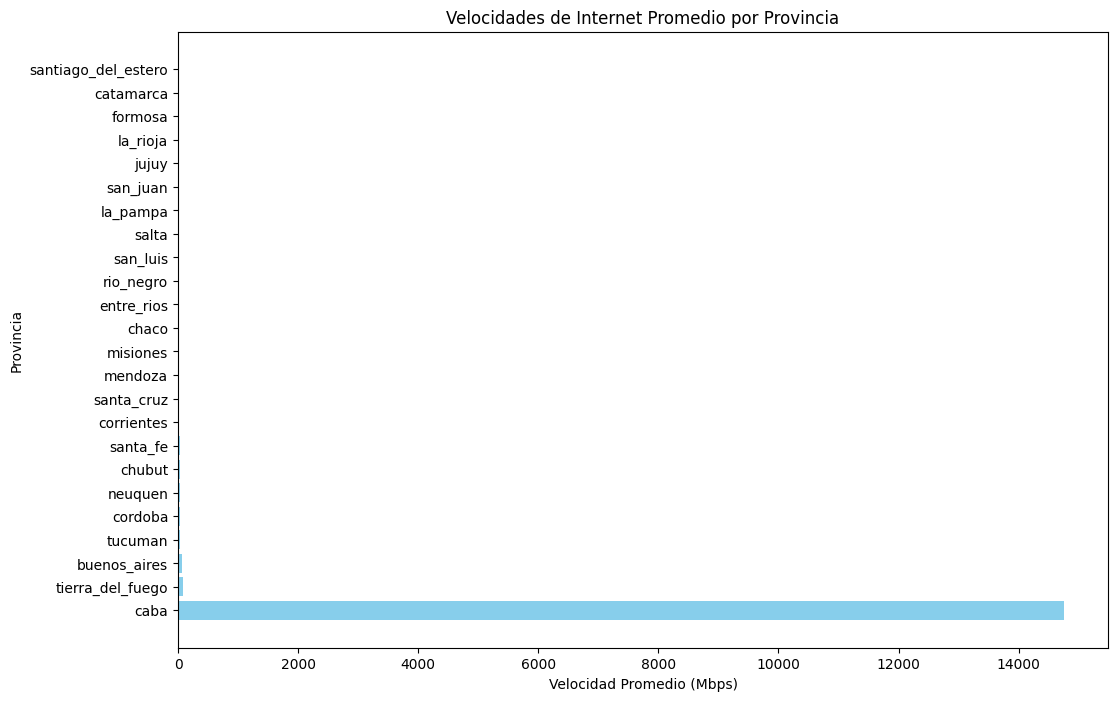

In [793]:
# Creo el gráfico
plt.figure(figsize=(12, 8))
plt.barh(provincia_promedio_ordenado['provincia'], provincia_promedio_ordenado['velocidad_promedio'], color='skyblue')
plt.xlabel('Velocidad Promedio (Mbps)')
plt.ylabel('Provincia')
plt.title('Velocidades de Internet Promedio por Provincia')
plt.gca().invert_yaxis()  # Para mostrar la provincia con menor velocidad en la parte superior
plt.show()

- Verifico el df de los outliers

In [794]:
outliers

,provincia,partido,localidad,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,800_mbps,850_mbps,900_mbps,999_mbps,1000_mbps,1024_mbps,4000_mbps,10000_mbps,cluster_kmeans,velocidad_promedio
62,buenos_aires,bahia_blanca,bahia_blanca,6056010.0,33.0,2.0,19.0,1.0,184.0,152.0,...,0.0,0.0,0.0,0.0,147.0,0.0,0.0,0.0,0,1229.245098
271,buenos_aires,general_pueyrredon,mar_del_plata,6357110.0,144.0,0.0,34.0,3.0,367.0,276.0,...,0.0,0.0,0.0,0.0,955.0,0.0,0.0,0.0,2,2701.078431
374,buenos_aires,la_plata,la_plata,6441030.0,149.0,1.0,65.0,2.0,757.0,1320.0,...,0.0,0.0,0.0,0.0,4467.0,0.0,0.0,0.0,2,1937.343137
717,caba,ciudad_autonoma_de_buenos_aires,ciudad_autonoma_de_buenos_aires,2000010.0,0.0,31.0,451.0,34.0,1307.0,4111.0,...,1.0,0.0,0.0,25.0,68405.0,0.0,0.0,0.0,1,14752.068627
860,chaco,san_fernando,resistencia,22140060.0,36.0,0.0,5.0,1.0,0.0,172.0,...,0.0,0.0,0.0,0.0,131.0,0.0,0.0,0.0,0,981.009804
956,cordoba,capital,cordoba,14014010.0,166.0,2.0,10.0,8.0,33.0,1058.0,...,0.0,1.0,0.0,0.0,2126.0,0.0,0.0,0.0,2,5125.166667
1816,mendoza,capital,mendoza,50007010.0,98.0,0.0,28.0,6.0,81.0,61.0,...,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,2,1097.686275
1975,misiones,capital,posadas,54028030.0,644.0,0.0,6.0,2.0,0.0,163.0,...,0.0,0.0,0.0,0.0,219.0,0.0,0.0,0.0,0,1075.088235
2214,salta,capital,salta,66028050.0,85.0,0.0,1.0,2.0,1.0,352.0,...,0.0,0.0,0.0,0.0,310.0,0.0,0.0,0.0,2,1352.431373
2667,santa_fe,la_capital,santa_fe,82063170.0,96.0,2.0,9.0,2.0,1.0,683.0,...,0.0,0.0,0.0,0.0,408.0,0.0,0.0,0.0,0,1281.990196


 - y los del df general

In [795]:
df_reduced_1

,provincia,partido,localidad,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,800_mbps,850_mbps,900_mbps,999_mbps,1000_mbps,1024_mbps,4000_mbps,10000_mbps,cluster_kmeans,velocidad_promedio
0,buenos_aires,25_de_mayo,25_de_mayo,6854100.0,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,61.225490
1,buenos_aires,25_de_mayo,agustin_mosconi,6854010.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.627451
2,buenos_aires,25_de_mayo,del_valle,6854020.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.882353
3,buenos_aires,25_de_mayo,ernestina,6854030.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.735294
4,buenos_aires,25_de_mayo,gobernador_ugarte,6854040.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.774510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,tucuman,tafi_viejo,villa_mariano_moreno__el_colmenar,90105100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0,72.764706
3061,tucuman,trancas,san_pedro_de_colalao,90112020.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.156863
3062,tucuman,trancas,villa__de_trancas,90112030.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.950980
3063,tucuman,yerba_buena,villa_carmela,90119020.0,8.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.941176


- De los outliers que encontre solo elimino el que corresponde a CABA porque no esta desglosado por barrio

In [796]:
df_limpio = df_reduced_1.drop(index=717)

In [797]:
df_limpio

,provincia,partido,localidad,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,800_mbps,850_mbps,900_mbps,999_mbps,1000_mbps,1024_mbps,4000_mbps,10000_mbps,cluster_kmeans,velocidad_promedio
0,buenos_aires,25_de_mayo,25_de_mayo,6854100.0,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,61.225490
1,buenos_aires,25_de_mayo,agustin_mosconi,6854010.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.627451
2,buenos_aires,25_de_mayo,del_valle,6854020.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.882353
3,buenos_aires,25_de_mayo,ernestina,6854030.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.735294
4,buenos_aires,25_de_mayo,gobernador_ugarte,6854040.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.774510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,tucuman,tafi_viejo,villa_mariano_moreno__el_colmenar,90105100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0,72.764706
3061,tucuman,trancas,san_pedro_de_colalao,90112020.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.156863
3062,tucuman,trancas,villa__de_trancas,90112030.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.950980
3063,tucuman,yerba_buena,villa_carmela,90119020.0,8.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.941176


In [798]:
# Selecciono las columnas de tipo int o float, 
col_numer = df_limpio.select_dtypes(include=['int', 'float'])

# Excluyo las columnas de 'link_indec' y 'otros'
columnas_excluidas = ['link_indec', 'otros']
df_sin_linkniotros = df_limpio.drop(columns=columnas_excluidas)
df_sin_linkniotros

,provincia,partido,localidad,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,15_mbps,2_mbps,...,800_mbps,850_mbps,900_mbps,999_mbps,1000_mbps,1024_mbps,4000_mbps,10000_mbps,cluster_kmeans,velocidad_promedio
0,buenos_aires,25_de_mayo,25_de_mayo,0.0,2.0,0.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,61.225490
1,buenos_aires,25_de_mayo,agustin_mosconi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.627451
2,buenos_aires,25_de_mayo,del_valle,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.882353
3,buenos_aires,25_de_mayo,ernestina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.735294
4,buenos_aires,25_de_mayo,gobernador_ugarte,0.0,0.0,0.0,0.0,0.0,0.0,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.774510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,tucuman,tafi_viejo,villa_mariano_moreno__el_colmenar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0,72.764706
3061,tucuman,trancas,san_pedro_de_colalao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.156863
3062,tucuman,trancas,villa__de_trancas,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.950980
3063,tucuman,yerba_buena,villa_carmela,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.941176


- Determino que las cantidades de velocidades que pasan los 1000 no las voy a tener en cuenta para mi analisis y filtro las velocidad promedio menor a 1000 Mbps

In [799]:
df_1_menos1000 = df_sin_linkniotros[df_sin_linkniotros['velocidad_promedio'] < 1001 ]

- Ordeno de mayor a manor segun la columna velocidad_promedio

In [800]:
df_1_menos1000 = df_1_menos1000.sort_values(by='velocidad_promedio', ascending=False)
df_1_menos1000.head()

,provincia,partido,localidad,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,15_mbps,2_mbps,...,800_mbps,850_mbps,900_mbps,999_mbps,1000_mbps,1024_mbps,4000_mbps,10000_mbps,cluster_kmeans,velocidad_promedio
860,chaco,san_fernando,resistencia,0.0,5.0,1.0,0.0,172.0,0.0,46.0,...,0.0,0.0,0.0,0.0,131.0,0.0,0.0,0.0,0,981.009804
2890,santiago_del_estero,capital,santiago_del_estero,0.0,4.0,1.0,908.0,172.0,0.0,5.0,...,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,2,978.970588
1471,entre_rios,parana,parana,0.0,3.0,0.0,5.0,387.0,0.0,245.0,...,0.0,0.0,0.0,0.0,367.0,0.0,0.0,0.0,0,963.607843
1311,corrientes,capital,corrientes,0.0,1.0,1.0,0.0,485.0,0.0,643.0,...,0.0,0.0,0.0,0.0,256.0,0.0,0.0,0.0,0,931.264706
626,buenos_aires,san_miguel,san_miguel,0.0,7.0,2.0,44.0,13.0,0.0,1570.0,...,0.0,0.0,0.0,0.0,118.0,0.0,0.0,0.0,2,925.460784


- Elimino las columnas que en la segmentacion cree, ya no me sirve

In [801]:
df_1_menos1000 = df_1_menos1000.drop(columns='cluster_kmeans')

In [802]:
# df_1_menos1000 = df_1_menos1000.drop(columns='cluster_dbscan')

In [803]:
df_1_menos1000

,provincia,partido,localidad,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,15_mbps,2_mbps,...,700_mbps,800_mbps,850_mbps,900_mbps,999_mbps,1000_mbps,1024_mbps,4000_mbps,10000_mbps,velocidad_promedio
860,chaco,san_fernando,resistencia,0.0,5.0,1.0,0.0,172.0,0.0,46.0,...,0.0,0.0,0.0,0.0,0.0,131.0,0.0,0.0,0.0,981.009804
2890,santiago_del_estero,capital,santiago_del_estero,0.0,4.0,1.0,908.0,172.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,978.970588
1471,entre_rios,parana,parana,0.0,3.0,0.0,5.0,387.0,0.0,245.0,...,0.0,0.0,0.0,0.0,0.0,367.0,0.0,0.0,0.0,963.607843
1311,corrientes,capital,corrientes,0.0,1.0,1.0,0.0,485.0,0.0,643.0,...,0.0,0.0,0.0,0.0,0.0,256.0,0.0,0.0,0.0,931.264706
626,buenos_aires,san_miguel,san_miguel,0.0,7.0,2.0,44.0,13.0,0.0,1570.0,...,0.0,0.0,0.0,0.0,0.0,118.0,0.0,0.0,0.0,925.460784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,santiago_del_estero,moreno,las_tinajas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2958,santiago_del_estero,rio_hondo,chanar_pozo_de_abajo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2964,santiago_del_estero,rio_hondo,mansupa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3046,tucuman,rio_chico,santa_ana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


- Visualizo un diagrama de Caja (Boxplot) para Ver la distribución

C:\Users\elian\AppData\Local\Temp\ipykernel_14424\1790366840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='velocidad_promedio', y='provincia', data=df_1_menos1000, palette='viridis')


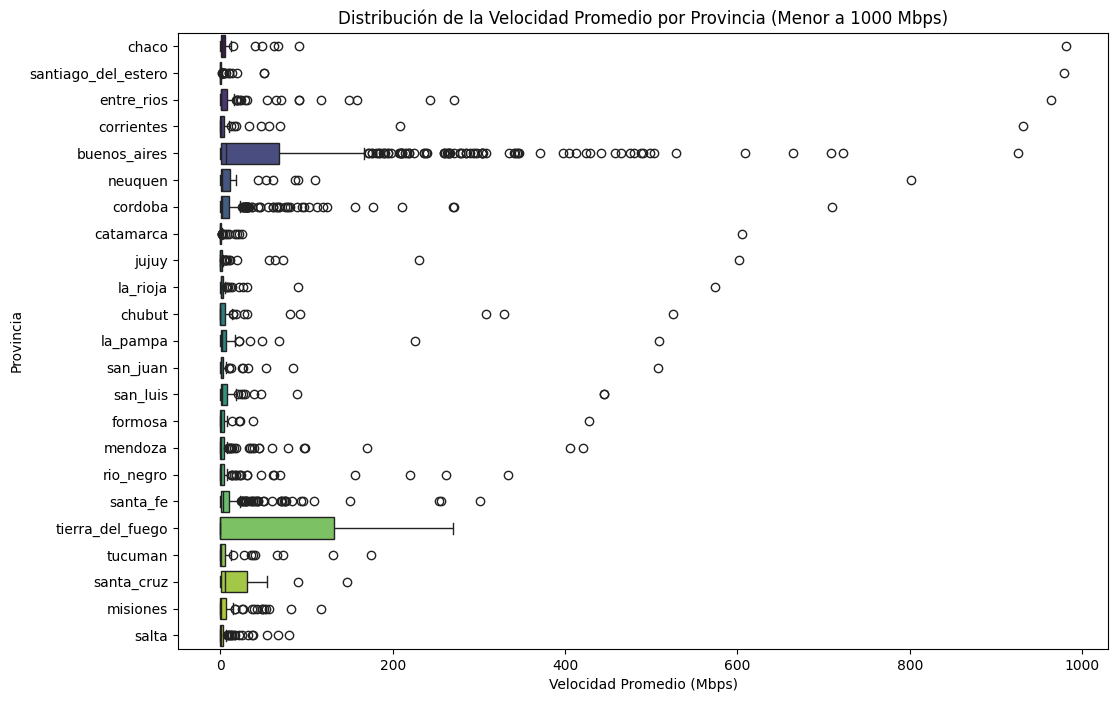

In [804]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='velocidad_promedio', y='provincia', data=df_1_menos1000, palette='viridis')
plt.title('Distribución de la Velocidad Promedio por Provincia (Menor a 1000 Mbps)')
plt.xlabel('Velocidad Promedio (Mbps)')
plt.ylabel('Provincia')
plt.show()

# Nuevamente pruebo la segmentación de datos cuantitativos para detectar áreas similares o con potenciales para expansión

- Selecciono las columnas relacionadas con la velocidad de conexión filtrando por 'mbps'

In [805]:
vel_columns = df_1_menos1000.columns[df_1_menos1000.columns.str.contains('mbps')].tolist() + ['velocidad_promedio']

# Filtro las columnas seleccionadas
df_clustering = df_1_menos1000[vel_columns]

# Me aseguro que no haya valores nulos
df_clustering = df_clustering.fillna(0)

# Normalizo las variables para que tengan media 0 y desviación estándar 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

- Mediante el método del codo calculo la suma de los errores cuadráticos (inercia) para diferentes números de clusters

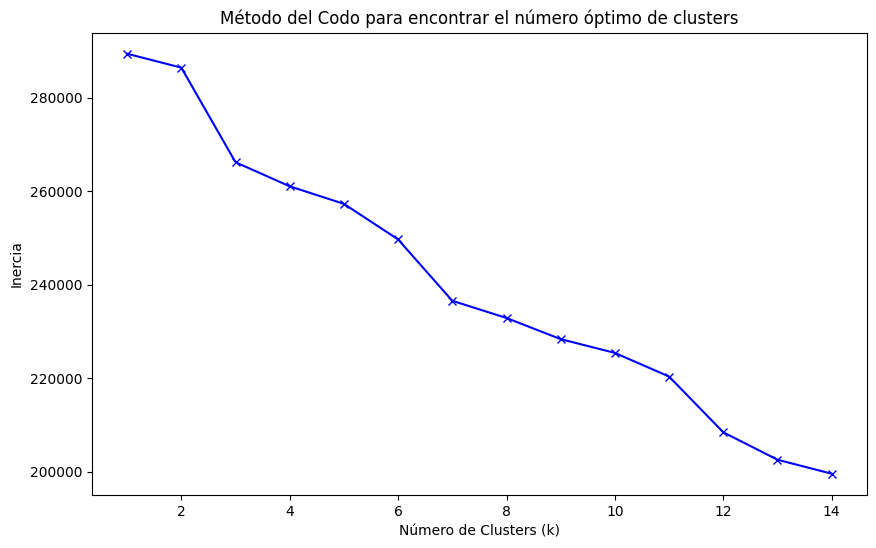

In [806]:
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

- De acuerdo al método del codo pruebo con el número óptimo del clusters

In [807]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_clustering_scaled)

# Añadir los clusters al DataFrame original
df_1_menos1000['cluster'] = clusters

C:\Users\elian\AppData\Local\Temp\ipykernel_14424\596915094.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1_menos1000['cluster'] = clusters


- Visualización de los clusters

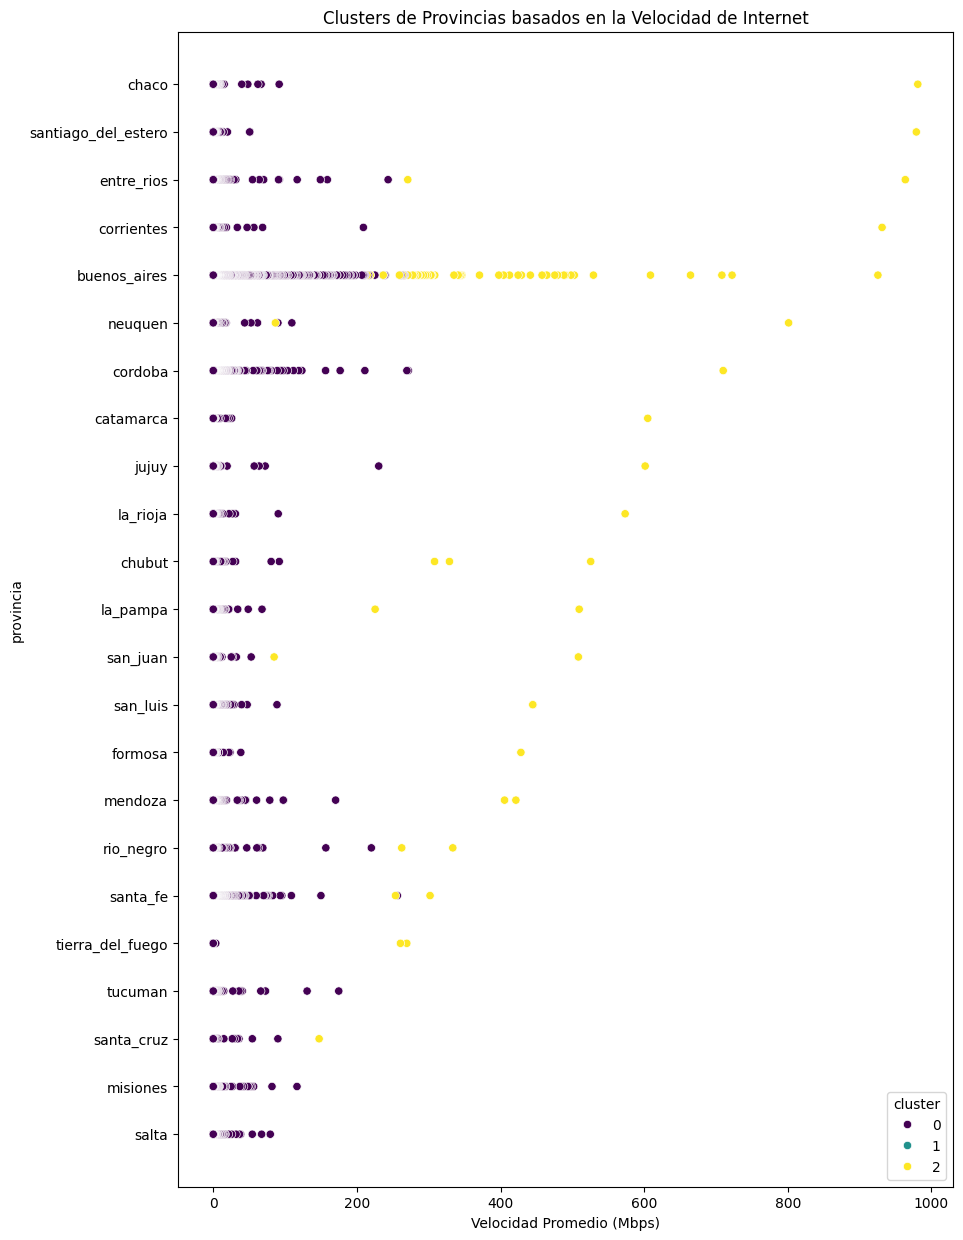

In [808]:
plt.figure(figsize=(10, 15))
sns.scatterplot(x='velocidad_promedio', y='provincia', hue='cluster', data=df_1_menos1000, palette='viridis')
plt.title('Clusters de Provincias basados en la Velocidad de Internet')
plt.xlabel('Velocidad Promedio (Mbps)')
plt.ylabel('provincia')
plt.show()

- Visualización con Gráfico de Barras. Visualizar las velocidades promedio de internet ordenadas

C:\Users\elian\AppData\Local\Temp\ipykernel_14424\4197259321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='velocidad_promedio', y='provincia', data=df_1_menos1000, palette='viridis')


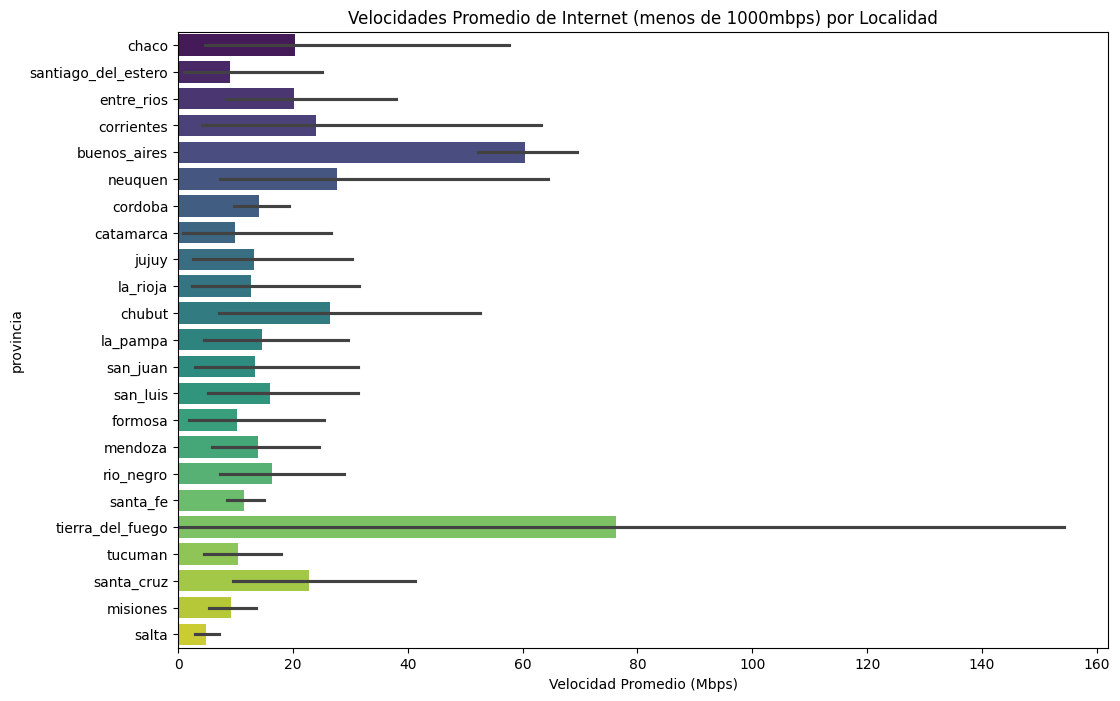

In [809]:
# Gráfico de barras ordenado
plt.figure(figsize=(12, 8))
sns.barplot(x='velocidad_promedio', y='provincia', data=df_1_menos1000, palette='viridis')
plt.title('Velocidades Promedio de Internet (menos de 1000mbps) por Localidad')
plt.xlabel('Velocidad Promedio (Mbps)')
plt.ylabel('provincia')
plt.show()

- Aplico PCA y visualizo los Clusters

C:\Users\elian\AppData\Local\Temp\ipykernel_14424\3361023446.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1_menos1000['pca1'] = df_pca[:, 0]
C:\Users\elian\AppData\Local\Temp\ipykernel_14424\3361023446.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1_menos1000['pca2'] = df_pca[:, 1]


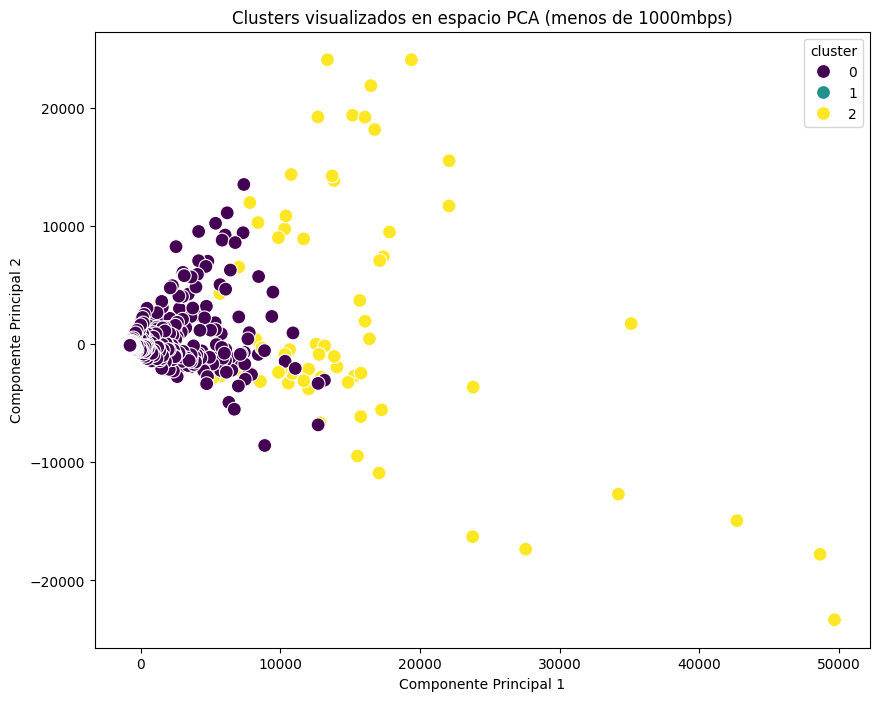

In [810]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_1_menos1000.select_dtypes(include=[float, int]))

# Añado los componentes principales al df
df_1_menos1000['pca1'] = df_pca[:, 0]
df_1_menos1000['pca2'] = df_pca[:, 1]

# Visualizo los clusters en el espacio PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_1_menos1000, palette='viridis', s=100)
plt.title('Clusters visualizados en espacio PCA (menos de 1000mbps)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

- Mapa de Calor por Provincia y Cluster

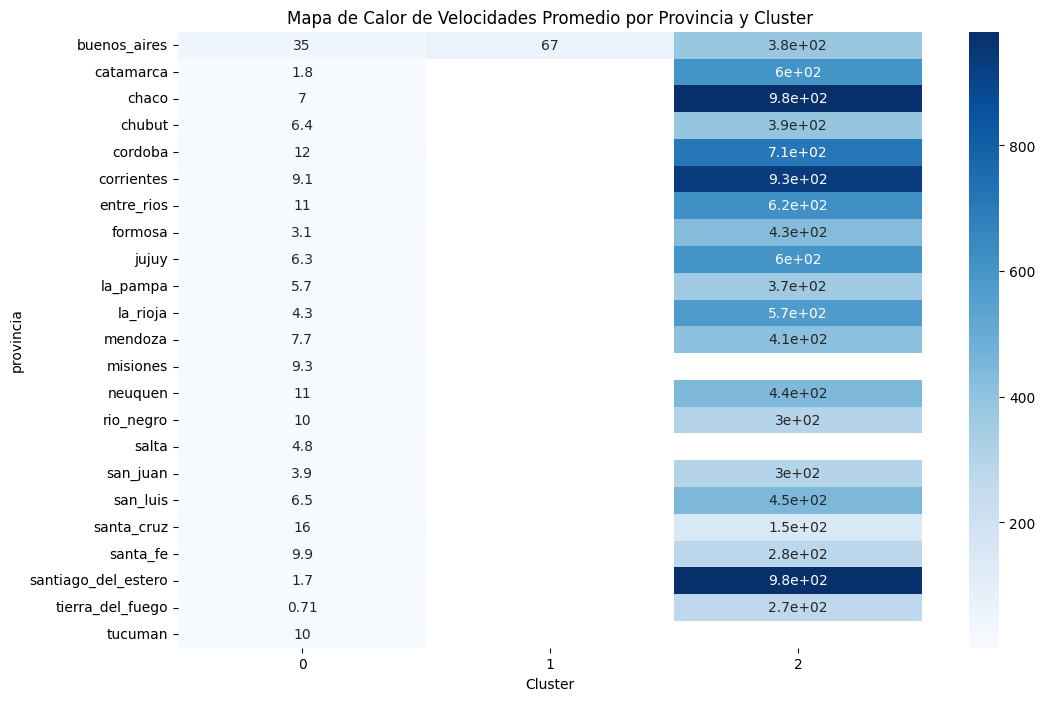

In [811]:
plt.figure(figsize=(12, 8))
pivot_table = df_1_menos1000.pivot_table(values='velocidad_promedio', index='provincia', columns='cluster', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Mapa de Calor de Velocidades Promedio por Provincia y Cluster')
plt.xlabel('Cluster')
plt.ylabel('provincia')
plt.show()

- No puedo hacer una interpretacion de mis graficas, por lo que describo la columna nueva

In [812]:
cluster_stats = df_1_menos1000.groupby('cluster')['velocidad_promedio'].describe()
print(cluster_stats)

          count        mean         std        min         25%         50%  \
cluster                                                                      
0        2903.0   14.222998   35.222334   0.000000    0.210784    1.450980   
1           1.0   66.813725         NaN  66.813725   66.813725   66.813725   
2          80.0  414.347059  200.630529  84.735294  279.887255  345.235294   

                75%         max  
cluster                          
0          8.132353  271.588235  
1         66.813725   66.813725  
2        492.034314  981.009804  


- Lo gráfico por cajas

C:\Users\elian\AppData\Local\Temp\ipykernel_14424\1257338674.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='velocidad_promedio', data=df_1_menos1000, palette='viridis')


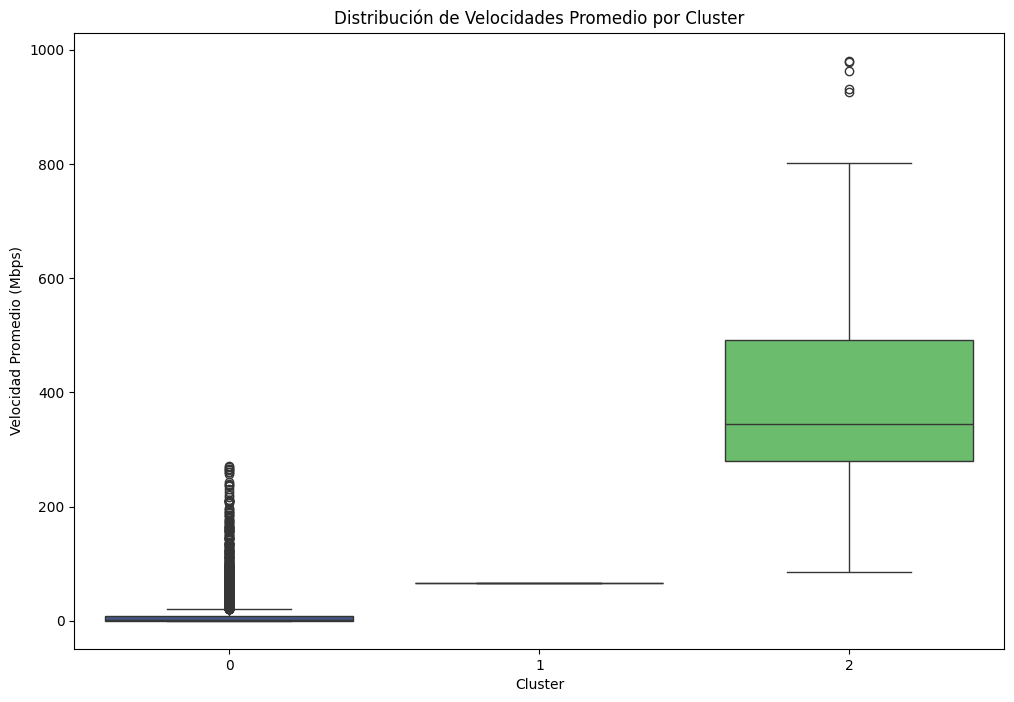

In [813]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='velocidad_promedio', data=df_1_menos1000, palette='viridis')
plt.title('Distribución de Velocidades Promedio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.show()

- Describo la velocidad promedio por provincia

In [814]:
cluster_provincia_stats = df_1_menos1000.groupby(['cluster', 'provincia'])['velocidad_promedio'].describe()
print(cluster_provincia_stats)

                             count        mean         std         min  \
cluster provincia                                                        
0       buenos_aires         646.0   35.317793   56.370339    0.000000   
        catamarca             73.0    1.766586    5.002972    0.000000   
        chaco                 72.0    7.034450   16.078053    0.000000   
        chubut                54.0    6.433551   17.252051    0.000000   
        cordoba              376.0   12.284548   30.980286    0.000000   
        corrientes            61.0    9.106879   29.212553    0.000000   
        entre_rios           135.0   11.366086   32.154714    0.000000   
        formosa               58.0    3.133536    6.534081    0.029412   
        jujuy                 85.0    6.313495   27.415616    0.000000   
        la_pampa              79.0    5.663192   10.600188    0.000000   
        la_rioja              67.0    4.285045   12.156124    0.009804   
        mendoza              128.0    

- Media de las velocidades promedio por cluster y provincia

In [815]:
mean_speed_by_cluster_provincia = df_1_menos1000.groupby(['cluster', 'provincia'])['velocidad_promedio'].mean()
print(mean_speed_by_cluster_provincia)

cluster  provincia          
0        buenos_aires            35.317793
         catamarca                1.766586
         chaco                    7.034450
         chubut                   6.433551
         cordoba                 12.284548
         corrientes               9.106879
         entre_rios              11.366086
         formosa                  3.133536
         jujuy                    6.313495
         la_pampa                 5.663192
         la_rioja                 4.285045
         mendoza                  7.692632
         misiones                 9.293347
         neuquen                 10.711285
         rio_negro               10.121310
         salta                    4.800132
         san_juan                 3.889166
         san_luis                 6.460131
         santa_cruz              16.186791
         santa_fe                 9.927897
         santiago_del_estero      1.725637
         tierra_del_fuego         0.709804
         tucuman         

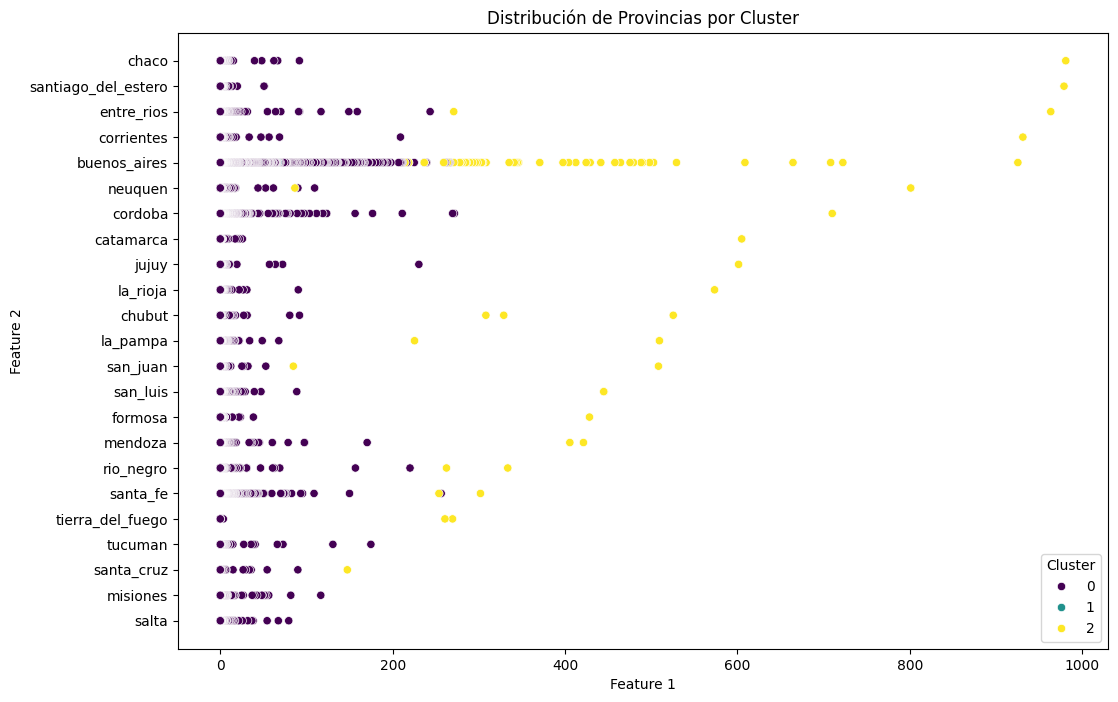

In [816]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='velocidad_promedio', y='provincia', hue='cluster', data=df_1_menos1000, palette='viridis', marker='o')
plt.title('Distribución de Provincias por Cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

### Puedo ver con mas claridad la velocidad promedio por provincia de mayor a menor y verifico las zonas similares

In [817]:
# Exporto el dataframe para trabajarlo en mi dashboard
df_1_menos1000.to_csv('../datasets/procesado/velocidad_promedio_zonas_similares.csv')

# KPI: Reducción de la Variabilidad de Velocidad entre Clusters

Este KPI se enfocará en reducir la variabilidad de la velocidad promedio de internet entre los diferentes clusters dentro de una provincia o partido. Una alta variabilidad sugiere que algunas áreas dentro de un cluster tienen significativamente mejor o peor acceso que otras, lo cual indica una infraestructura inconsistente.

- Calculo la desviación estándar de 'velocidad_promedio' por 'provincia', 'partido' y 'cluster'

In [818]:
std_by_cluster = df_1_menos1000.groupby(['provincia', 'partido', 'cluster'])['velocidad_promedio'].std().reset_index()

- Muestro las desviaciones estándar por cluster

In [819]:
print(std_by_cluster.head())

      provincia                 partido  cluster  velocidad_promedio
0  buenos_aires              25_de_mayo        0           19.002118
1  buenos_aires              9_de_julio        0           50.307403
2  buenos_aires           adolfo_alsina        0           13.031978
3  buenos_aires  adolfo_gonzales_chaves        0            9.970876
4  buenos_aires                 alberti        0            2.157329


- Calculo el KPI como la desviación estándar promedio entre clusters

In [820]:
kpi_value = std_by_cluster['velocidad_promedio'].mean()
print(f"KPI de Desviación Estándar Promedio: {kpi_value}")

KPI de Desviación Estándar Promedio: 21.546016807064877


- Si tienes un valor objetivo, por ejemplo, una reducción del 10% en la desviación estándar:

In [821]:
target_reduction = kpi_value * 0.9
print(f"KPI Objetivo de Desviación Estándar: {target_reduction}")

KPI Objetivo de Desviación Estándar: 19.39141512635839


- Crear un gráfico de cajas para la velocidad promedio por cluster

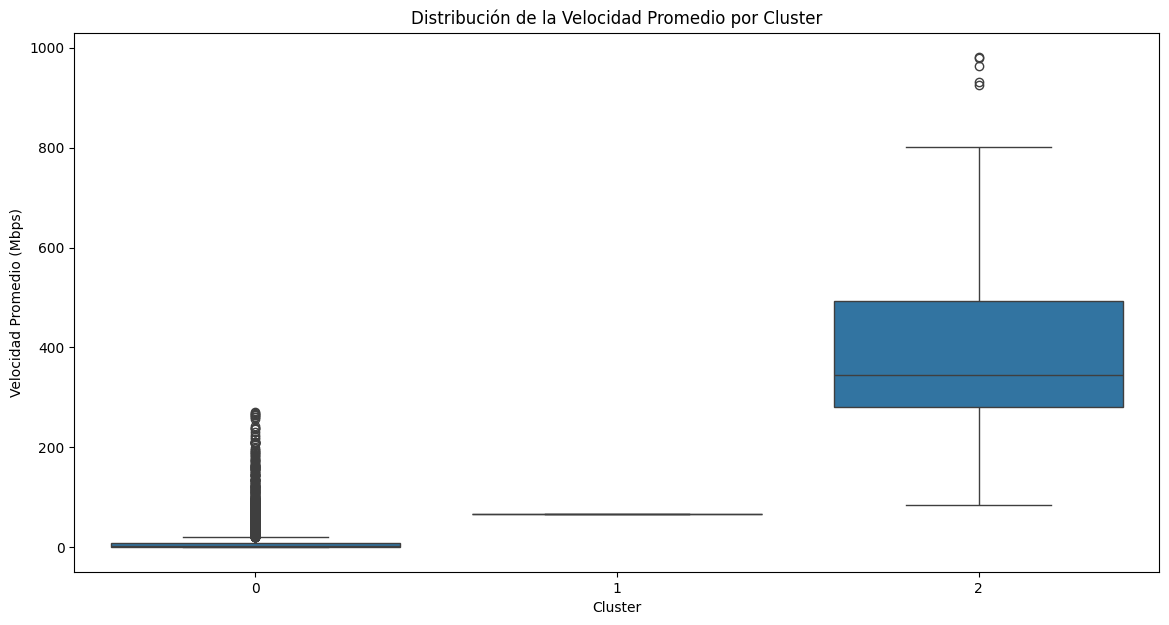

In [822]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='cluster', y='velocidad_promedio', data=df_1_menos1000)
plt.title('Distribución de la Velocidad Promedio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.show()

- Creo un gráfico de dispersión para la velocidad promedio por cluster y partido

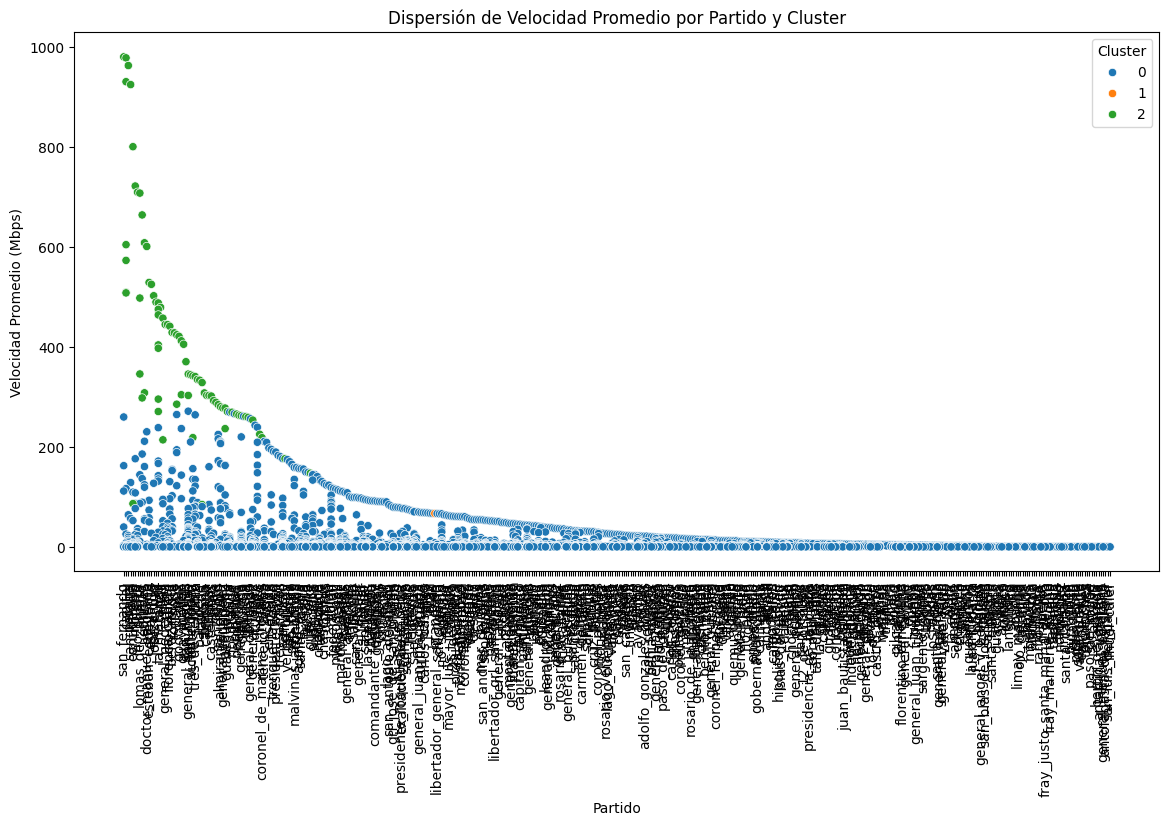

In [823]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='partido', y='velocidad_promedio', hue='cluster', data=df_1_menos1000, palette='tab10')
plt.title('Dispersión de Velocidad Promedio por Partido y Cluster')
plt.xlabel('Partido')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()